# **Introduction**

**In this kernel,we will be learning about Convolution neural networks.We will learn**
- [how to prepare your data to feed to a neural network](#1)
- [how convolution neural network works](#2)
- [how to implement cnn in keras](#3)
- [how to evaluvate your results](#4)
- [how to use keras pretrained network to improve your model](#5)
- [how to predict and  create a submission](#6)
   

**if you like my kernel,please consider upvoting**

![](https://media.giphy.com/media/BmmfETghGOPrW/giphy.gif)

and it's no rocket science,its fun.

### Loading required libraries

In [1]:
import pandas as pd 
import os
from IPython.display import Image
# from keras.preprocessing import image
# from keras import optimizers
# from keras import layers,models
# from keras.applications.imagenet_utils import preprocess_input
# #import matplotlib.pyplot as plt
# #import seaborn as sns
# from keras import regularizers
# from keras.preprocessing.image import ImageDataGenerator
# from keras.applications.vgg16 import VGG16
print(os.listdir("input"))
import numpy as np

['.DS_Store', 'test', 'train', 'train.csv', 'sample_submission.csv']


### Setting our directories

In [2]:
train=pd.read_csv('input/train.csv')
df_test=pd.read_csv('input/sample_submission.csv')

## Getting a basic idea

In [3]:
train.head(5)
train.has_cactus=train.has_cactus.astype(str)

In [4]:
print('out dataset has {} rows and {} columns'.format(train.shape[0],train.shape[1]))

out dataset has 17500 rows and 2 columns


In [5]:
train['has_cactus'].value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

In [6]:
print("The number of rows in test set is %d"%(len(os.listdir('input/test'))))

The number of rows in test set is 4000


### Displaying an image

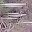

In [7]:
Image(os.path.join("input/train",train.iloc[0,0]),width=250,height=250)

## Data preparation [](#1)  <a id="1"></a> <br>

As you know,data should be processed into appropriatly pre-processed floating point 
tensors before being fed to our network.So the steps for getting it into our network are roughly 

- Read the picture files
- Decode JPEG content to RGB pixels
- Convert this into floating tensors
- Rescale pixel values (between 0 to 255) to [0,1] interval.

we will make use of ImageDataGenerator method available in keras to do all the preprocessing.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1./255)
batch_size=150

**flow_from_dataframe Method**

This method is useful when the images are clustered in only one folder. To put in other words images from different class/labels reside in only one folder. Generally, with such kind of data, some text files containing information on class and other parameters are provided. In this case, we will create a dataframe using pandas and text files provided, and create a meaningful dataframe with columns having file name (only the file names, not the path) and other classes to be used by the model. For this method, arguments to be used are:

    dataframe value : Dataframe having meaningful data (file name, class columns are a must)
    directory value : The path to the parent directory containing all images.
    x_col value : which will be the name of column(in dataframe) having file names
    y_col value : which will be the name of column(in dataframe) having class/label

In [9]:
train_dir="input/train"
test_dir="input/test"
train_generator=datagen.flow_from_dataframe(dataframe=train[:15001],directory=train_dir,x_col='id',
                                            y_col='has_cactus',class_mode='binary',batch_size=batch_size,
                                            target_size=(150,150))


validation_generator=datagen.flow_from_dataframe(dataframe=train[15000:],directory=train_dir,x_col='id',
                                                y_col='has_cactus',class_mode='binary',batch_size=50,
                                                target_size=(150,150))

Found 15001 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


### Splitting our train and validation dataset

Now,after preprocessing is done with our data we will split our dataset to
training and validation for training our model and validating the result repectively.
We will take first 15000 images to train our data and last 2500 images to validate our model later.


## A brief intro to CNN[](#2) <a id='2'> </a><br>

The convolution operation is the building block of a convolutional neural network as the name suggests it.
Now, in the field of computer vision, an image can be expressed as a matrix of RGB values.
Therefore, let’s consider the 6x6 matrix below as a part of an image:
![](https://cdn-images-1.medium.com/max/800/1*aGSthcPASa2OT1UBm7paOA.png)
And the filter will be the following matrix:
![](https://cdn-images-1.medium.com/max/800/1*591OPcvDKUN9liZ_VQ1M5g.png)
Then, the convolution involves superimposing the filter onto the image matrix, adding the product of the values from the filter and and the values from the image matrix, which will generate a 4x4 convoluted layer.

This is very hard to put in words, but here is a nice animation that explains the convolution:
![](https://cdn-images-1.medium.com/max/800/1*VJCoCYjnjBBtWDLrugCBYQ.gif)

Convolutions are defined on two key parameters
- The size of patches that are extracted from input feature map..ie here 3x3
- The number of filters computed from convolutions

### Maxpooling

Maxpooling consist of extracting features from input feature map and outputig maximum value of each channel.
![](https://cdn-images-1.medium.com/max/800/1*Ziqq69FhwOAbBi9-FNruAA.png)

## Building our model [](#3) <a id="3"></a><br> 

[](http://)Now we will build our network.We will build our model such that it contains
5 **Conv2D + Maxpooling2D stages** with **relu** activation function.

In [11]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import optimizers
from tensorflow.keras import layers,models
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras import regularizers
from tensorflow.keras.applications.vgg16 import VGG16

In [12]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
         

Metal device set to: Apple M1


2022-05-19 11:26:29.281676: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-19 11:26:29.281916: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Displaying summary of our network

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Compiling our model

In this step we will specify 3 important things related to our model


- loss: we will set our loss as binary_crossentropy since we are
   attacking a binary classification problem
- optimizer : optimizers shape and mold your model into its most accurate possible form by futzing with the weights.
- metrics : This is the evaluation criteria that we choose to evaluate our model

In [15]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(learning_rate=1e-3),metrics=['acc'])

### Fitting our model 

Here we will use keras fit_generator() method instead of fit() method because we have used ImageDataGenerator to generate values.


In [16]:
%conda install pillow

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [17]:
epochs=10
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,validation_steps=50)

Epoch 1/10


/var/folders/bs/g6pz0yts3fg0jn57qwt68lt80000gn/T/ipykernel_40373/3254714774.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,validation_steps=50)
2022-05-19 11:26:55.656155: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-19 11:26:55.892910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.2384 - acc: 0.8957

2022-05-19 11:27:36.387402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 43s 419ms/step - loss: 0.2384 - acc: 0.8957 - val_loss: 0.1157 - val_acc: 0.9556
Epoch 2/10
100/100 [==============================] - 46s 465ms/step - loss: 0.1109 - acc: 0.9584 - val_loss: 0.0802 - val_acc: 0.9748
Epoch 3/10
100/100 [==============================] - 47s 467ms/step - loss: 0.0735 - acc: 0.9717 - val_loss: 0.0558 - val_acc: 0.9844
Epoch 4/10
100/100 [==============================] - 43s 427ms/step - loss: 0.0718 - acc: 0.9736 - val_loss: 0.0654 - val_acc: 0.9788
Epoch 5/10
100/100 [==============================] - 42s 417ms/step - loss: 0.0601 - acc: 0.9793 - val_loss: 0.0588 - val_acc: 0.9792
Epoch 6/10
100/100 [==============================] - 41s 415ms/step - loss: 0.0476 - acc: 0.9815 - val_loss: 0.0496 - val_acc: 0.9852
Epoch 7/10
100/100 [==============================] - 52s 523ms/step - loss: 0.0360 - acc: 0.9869 - val_loss: 0.0464 - val_acc: 0.9852
Epoch 8/10
100/100 [==============================] - 49s 482ms/st

## Evaluating our model[](#4)<a id="4"></a><br>

we will plot our results using matplotlib.first we will plot training and validation accuracy.

In [30]:
import plotly_express as px

In [35]:
train_acc, val_acc = history.history['acc'], history.history['val_acc']  ##getting  accuracy of each epochs
acc_df = pd.DataFrame({'epoch': range(0,epochs), 'train_acc': train_acc, 'val_acc': val_acc})

In [36]:
acc_df

,epoch,train_acc,val_acc
0,0,0.895697,0.9556
1,1,0.958387,0.9748
2,2,0.971719,0.9844
3,3,0.973604,0.9788
4,4,0.979267,0.9792
5,5,0.981483,0.9852
6,6,0.986937,0.9852
7,7,0.986533,0.9844
8,8,0.990977,0.9912
9,9,0.996027,0.9892


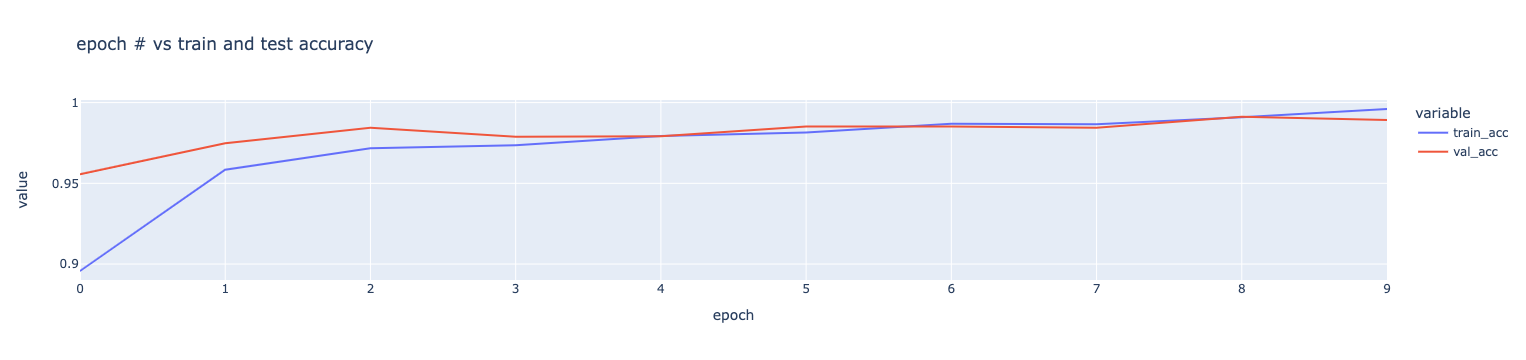

In [39]:
px.line(acc_df, x='epoch', y = ['train_acc','val_acc'], title="epoch # vs train and test accuracy")


## Improving our model using VGG16[](#5)<a id="5"></a><br> 

- Instantiating the VGG16 convolution base

In [18]:
model_vg=VGG16(weights='imagenet',include_top=False)
model_vg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### Extracting features using VGG16

In [24]:
def extract_features(directory,samples,df):
    
    
    features=np.zeros(shape=(samples,4,4,512))
    labels=np.zeros(shape=(samples))
    generator=datagen.flow_from_dataframe(dataframe=df,directory=directory,x_col='id',
                                            y_col='has_cactus',class_mode='raw',batch_size=batch_size,
                                            target_size=(150,150))
    i=0
    for input_batch,label_batch in generator:
        feature_batch=model_vg.predict(input_batch)
        features[i*batch_size:(i+1)*batch_size]=feature_batch
        labels[i*batch_size:(i+1)*batch_size]=label_batch
        i+=1
        if(i*batch_size>samples):
            break
    return(features,labels)

train.has_cactus=train.has_cactus.astype(int)
features,labels=extract_features(train_dir,17500,train)
train_features=features[:15001]
train_labels=labels[:15001]

validation_features=features[15000:]
validation_labels=labels[15000:]

Found 17500 validated image filenames.


### Reshaping our features to feed into our dense layers

In [25]:
test_features,test_labels=extract_features(test_dir,4000,df_test)

Found 4000 validated image filenames.


In [26]:
train_features=train_features.reshape((15001,4*4*512))
validation_features=validation_features.reshape((2500,4*4*512))
test_features=test_features.reshape((4000,4*4*512))

### Define a densely connected network

In [27]:
model=models.Sequential()
model.add(layers.Dense(212,activation='relu',kernel_regularizer=regularizers.l1_l2(.001),input_dim=(4*4*512)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation='sigmoid'))

In [41]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-3),loss='binary_crossentropy',metrics=['acc'])

In [50]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_acc',
    min_delta=0,
    patience=5,
    verbose=0,
    restore_best_weights=True
)

history=model.fit(train_features,train_labels,epochs=30,batch_size=15,validation_data=(validation_features,validation_labels), callbacks=[early_stopping_monitor])

Epoch 1/30
1001/1001 [==============================] - 9s 9ms/step - loss: 0.3004 - acc: 0.9713 - val_loss: 0.3084 - val_acc: 0.9704
Epoch 2/30
1001/1001 [==============================] - 9s 9ms/step - loss: 0.2995 - acc: 0.9720 - val_loss: 0.2514 - val_acc: 0.9784
Epoch 3/30
1001/1001 [==============================] - 9s 9ms/step - loss: 0.2988 - acc: 0.9719 - val_loss: 0.3385 - val_acc: 0.9652
Epoch 4/30
1001/1001 [==============================] - 9s 9ms/step - loss: 0.2917 - acc: 0.9737 - val_loss: 0.3117 - val_acc: 0.9668
Epoch 5/30
1001/1001 [==============================] - 9s 9ms/step - loss: 0.3076 - acc: 0.9689 - val_loss: 0.2963 - val_acc: 0.9684
Epoch 6/30
1001/1001 [==============================] - 9s 9ms/step - loss: 0.2939 - acc: 0.9726 - val_loss: 0.2707 - val_acc: 0.9788
Epoch 7/30
1001/1001 [==============================] - 9s 9ms/step - loss: 0.3061 - acc: 0.9699 - val_loss: 0.2929 - val_acc: 0.9784
Epoch 8/30
1001/1001 [==============================] - 9s 9ms

In [51]:
train_acc, val_acc = history.history['acc'], history.history['val_acc']  ##getting  accuracy of each epochs
acc_df = pd.DataFrame({'epoch': range(0,len(train_acc)), 'train_acc': train_acc, 'val_acc': val_acc})

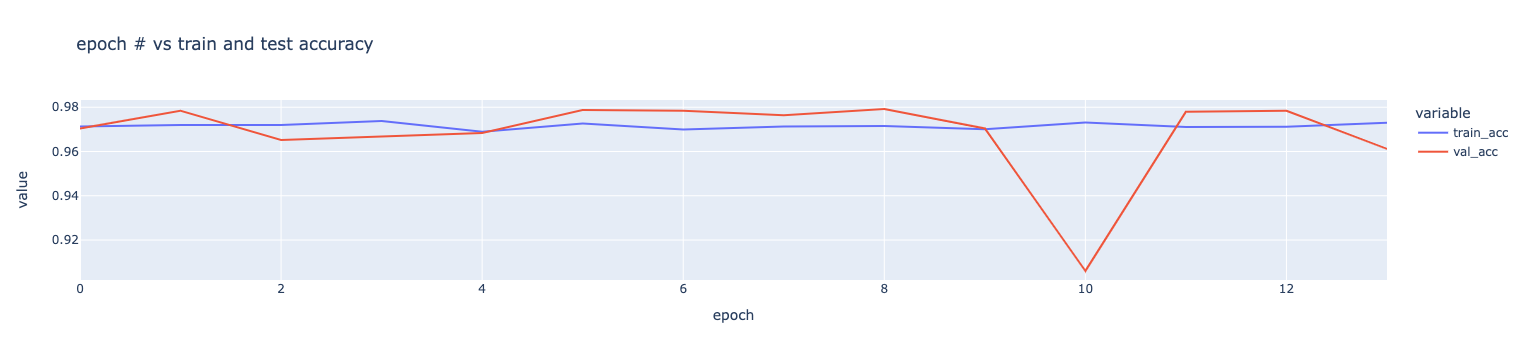

In [52]:
px.line(acc_df, x='epoch', y = ['train_acc','val_acc'], title="epoch # vs train and test accuracy")


## making prediction

In [54]:
y_pre=model.predict(test_features)

2022-05-19 14:42:59.281673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## More ways to transfer learning

See https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/